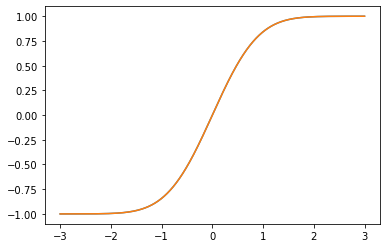

In [55]:
import numpy as np
import scipy.special

import kontrol.sensact

"""Tests for kontrol.sensact.calibration.calibrate"""
# Test method="linear"
xdata = np.linspace(-1, 1, 1000)
m = np.random.random()
c = np.random.random()
ydata = m*xdata + c

## Tests exception
try:
    kontrol.sensact.calibrate(xdata=xdata, ydata=ydata, method="abc")
    raise
except ValueError:
    pass

slope, intercept, linear_range, model = kontrol.sensact.calibrate(
    xdata=xdata, ydata=ydata, method="linear", return_linear_range=True,
    return_model=True)

assert np.allclose([m, c], [slope, intercept])
assert np.allclose(ydata, model(xdata))

# Test methor="erf"
xdata = np.linspace(-3, 3, 1000)
a = 1
b = 1
c = 0
d = 0
ydata = a*scipy.special.erf(b*(xdata-c)) + d
slope, intercept, linear_range, model = kontrol.sensact.calibrate(
    xdata=xdata, ydata=ydata, method="erf", return_linear_range=True,
    return_model=True)

assert np.allclose(
    [model.amplitude, model.slope, model.x_offset, model.y_offset],
    [a, b, c, d], rtol=1e-3, atol=1e-3)
assert np.allclose(model(xdata), ydata, rtol=1e-3, atol=1e-3)

In [51]:
print([model.amplitude, model.slope, model.x_offset, model.y_offset],
    [a, b, c, d])

[1.0000001912567689, 1.0000002830971713, -5.034014807560108e-07, 8.256271345563034e-08] [1, 1, 0, 0]


In [48]:
abs(ydata-model(xdata))

array([4.50377978e-06, 4.49989096e-06, 4.49595600e-06, 4.49197446e-06,
       4.48794592e-06, 4.48386994e-06, 4.47974609e-06, 4.47557395e-06,
       4.47135306e-06, 4.46708299e-06, 4.46276331e-06, 4.45839355e-06,
       4.45397329e-06, 4.44950206e-06, 4.44497943e-06, 4.44040494e-06,
       4.43577814e-06, 4.43109856e-06, 4.42636576e-06, 4.42157927e-06,
       4.41673864e-06, 4.41184340e-06, 4.40689308e-06, 4.40188723e-06,
       4.39682536e-06, 4.39170702e-06, 4.38653173e-06, 4.38129901e-06,
       4.37600840e-06, 4.37065942e-06, 4.36525158e-06, 4.35978442e-06,
       4.35425744e-06, 4.34867017e-06, 4.34302212e-06, 4.33731281e-06,
       4.33154175e-06, 4.32570845e-06, 4.31981243e-06, 4.31385319e-06,
       4.30783024e-06, 4.30174310e-06, 4.29559126e-06, 4.28937423e-06,
       4.28309152e-06, 4.27674262e-06, 4.27032705e-06, 4.26384429e-06,
       4.25729386e-06, 4.25067525e-06, 4.24398795e-06, 4.23723148e-06,
       4.23040531e-06, 4.22350896e-06, 4.21654192e-06, 4.20950367e-06,
      

In [53]:
?np.allclose

In [8]:
model(xdata)

array([0.31426534, 0.31435443, 0.31444379, 0.31453342, 0.31462332,
       0.31471349, 0.31480392, 0.31489464, 0.31498562, 0.31507688,
       0.3151684 , 0.31526021, 0.31535228, 0.31544463, 0.31553726,
       0.31563016, 0.31572334, 0.31581679, 0.31591053, 0.31600454,
       0.31609882, 0.31619339, 0.31628824, 0.31638336, 0.31647877,
       0.31657445, 0.31667042, 0.31676667, 0.31686321, 0.31696002,
       0.31705712, 0.3171545 , 0.31725217, 0.31735012, 0.31744836,
       0.31754689, 0.3176457 , 0.31774479, 0.31784418, 0.31794385,
       0.31804381, 0.31814407, 0.31824461, 0.31834544, 0.31844656,
       0.31854797, 0.31864968, 0.31875168, 0.31885396, 0.31895655,
       0.31905942, 0.3191626 , 0.31926606, 0.31936982, 0.31947388,
       0.31957823, 0.31968288, 0.31978783, 0.31989308, 0.31999862,
       0.32010446, 0.32021061, 0.32031705, 0.32042379, 0.32053083,
       0.32063818, 0.32074583, 0.32085378, 0.32096203, 0.32107058,
       0.32117944, 0.32128861, 0.32139808, 0.32150785, 0.32161